Predicting `last_evaluation` of employee by `satisfaction_level` from HR dataset of 14999 records. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

These lists are to save theta and mean square error history. Later will be used to plot data.

In [2]:
theta0List = []
theta1List = []
gradientList = []

Reading dataset

In [3]:
df = pd.read_csv('../HR_comma_sep.csv')
df.shape

(14999, 10)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Set hyper paramters
learning_rate = 0.01
num_iterations = 10000

In [6]:
# Only using for sales employees
df = df[ df['Department'] == 'sales' ]
df = df.reindex(pd.RangeIndex(df.index.max() + 1)).ffill()
#  df = df.iloc[0:100,0:10] for using only 100 employees
[m, n] = df.shape

In [7]:
X = df['satisfaction_level']
y = df['last_evaluation']
# y = mx + b (slope formula) ~ theta1.x + theta0
theta = [0, 0] # inital slope and y-itercept for hypothesis

The `CostClass`will be used store set of thetas and cost and in the end, we will fetch the record with smalled cost (mean square error)

In [8]:
class CostClass(object):
    def __init__(self, cost, theta0, theta1):
        self.cost = cost
        self.theta0 = theta0
        self.theta1 = theta1

In [9]:
def computeCost(m, theta, x, y):
    hypothesis = theta[0] - np.dot(x, theta[1])
    loss = hypothesis - y
    cost = np.sum(loss ** 2) / (2 * m)
    return cost

In [10]:
costThetaList = []

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, learning_rate, num_iterations):
    m = len(x)
    theta0Gradient = 0; # initial value
    theta1Gradient = 0; # initial value
    [theta0, theta1] = theta
    for i in range(0, num_iterations):
        cost = computeCost(m, theta, x, y)
        costThetaList.append(CostClass(cost, theta0, theta1)) # adding history data in set for fetching the minimum later
        
        # Appending value in lists for plotting the graph later-on
        gradientList.append(cost)
        theta0List.append(theta0)
        theta1List.append(theta1)
        
        # print("Iteration %d | Cost: %f | theta %f %f" % (i, cost,theta0, theta1))
        theta0Gradient += -(2/m) * (y[i] - ((theta1 * x[i]) + theta0))
        theta1Gradient += -(2/m) * x[i] * (y[i] - ((theta1 * x[i]) + theta1))
        theta0 = theta0 - (learning_rate * theta0Gradient)
        theta1 = theta1 - (learning_rate * theta1Gradient)
        theta = [theta0, theta1]
    return [theta0, theta1]

In [11]:
print("Starting gradient descent at b = %d, m = %d, error = %f" % (theta[0], theta[1], computeCost(m, theta, X, y)))

Starting gradient descent at b = 0, m = 0, error = 0.253438


In [12]:
print("Running...")
theta = gradientDescent(X, y, theta, learning_rate, num_iterations)

# Sort the data in ascending wrt mean square error
costThetaList.sort(key=lambda x: x.cost, reverse=False)
print("After %d iterations b = %f, m = %f, error = %f" % (num_iterations, costThetaList[0].theta0, costThetaList[0].theta1, costThetaList[0].cost))

Running...
After 10000 iterations b = 0.814110, m = 0.214621, error = 0.017684


Plot the graph from list we declared above. This is showing gradient descent of cost value wrt theta0 (y-intercept) and theat1 (slope)

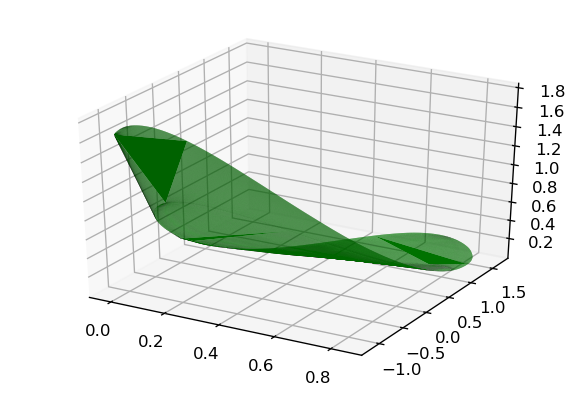

In [13]:
fig = plt.figure(dpi=120)
ax = plt.axes(projection='3d')
ax.plot_trisurf(theta1List, theta0List, gradientList, color='green')